# Name - Flynn Carnneiro

### Task - Perfrom 'Exploratory Data Analysis' on the provided dataset 'SampleSuperstore'

#### PROBLEM STATEMENT :You are the business owner of the retail firm and want to see how your company is performing. You are interested in finding out the weak areas where you can work to make more profit. What all business observations you can derive by looking into the data?

In [5]:
import os

In [6]:
os.getcwd()

'C:\\Users\\Dell'

In [7]:
os.chdir('C:\\Users\\Dell')

In [8]:
os.getcwd()

'C:\\Users\\Dell'

# Data Analysis

In [9]:
#Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
#Read Dataset

df=pd.read_csv("Sample_SuperStore.csv")

In [11]:
#To see first 10 Rows

df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [12]:
#Information of Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 702.8+ KB


In [13]:
#Describe the dataset

df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [14]:
#Check for null values

df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# Data Visualization

In [17]:
df["Ship Mode"].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

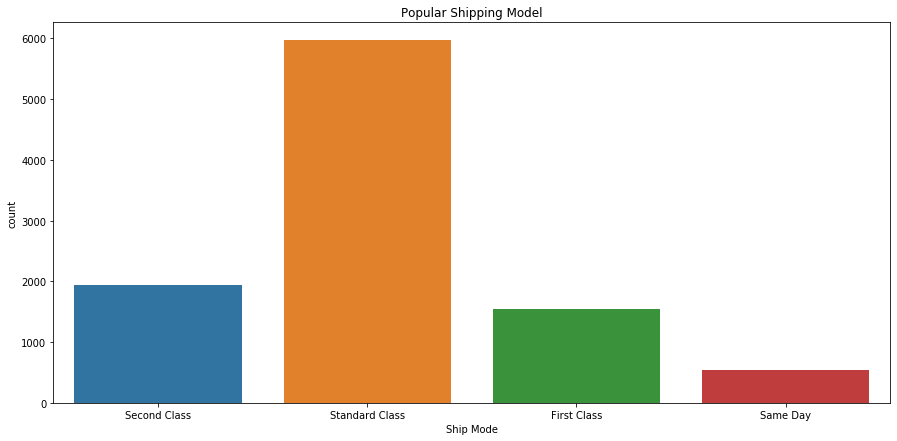

In [18]:
#Counting Ship Mode

fig=plt.figure(figsize=(15,7))

sns.countplot(x='Ship Mode',data=df)
plt.title("Popular Shipping Model")
plt.show()

In [23]:
#To Check Segment by Quantity Order

group = df.groupby('Segment')['Quantity'].sum().reset_index()
group

,Segment,Quantity
0,Consumer,19521
1,Corporate,11608
2,Home Office,6744


In [24]:
labels=group["Segment"].unique()
labels

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

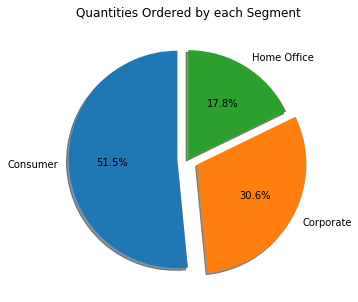

In [30]:
#To Check Quatity Ordered

fig=plt.figure(figsize=(8,5))

plt.pie(group['Quantity'],labels=labels,autopct='%1.1f%%',shadow=True,startangle=90,explode=(0.1,0.1,0))
plt.title('Quantities Ordered by each Segment')
plt.show()

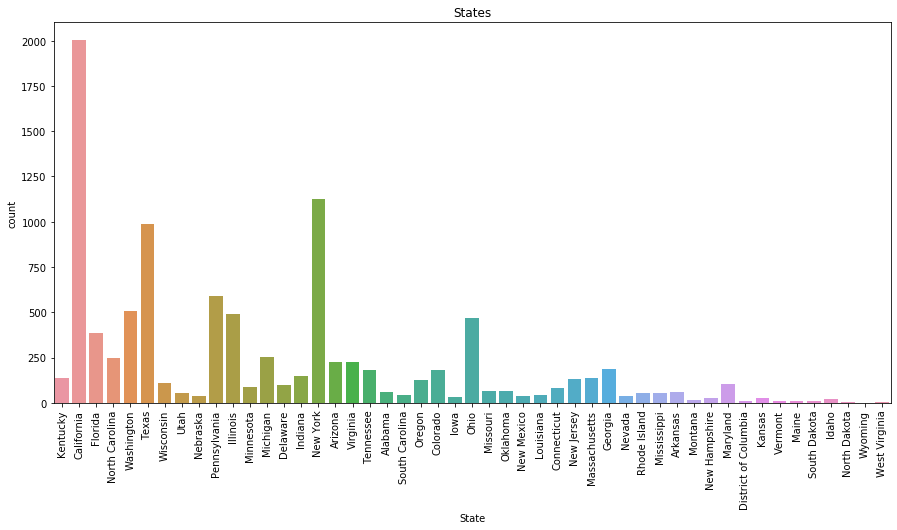

In [31]:
#Counting State

fig=plt.figure(figsize=(15,7))

sns.countplot(x='State',data=df)
plt.title("States")
plt.xticks(rotation=90)
plt.show()

In [33]:
#To check Top 15 cities by the Quantity Ordered

top15_city = df.groupby('City')['Quantity'].sum().reset_index().sort_values('Quantity',ascending=False)
top15_city = top15_city.head(15)
top15_city

,City,Quantity
329,New York City,3417
266,Los Angeles,2879
374,Philadelphia,1981
438,San Francisco,1935
452,Seattle,1590
207,Houston,1466
80,Chicago,1132
94,Columbus,836
437,San Diego,670
464,Springfield,649


<Figure size 1080x576 with 0 Axes>

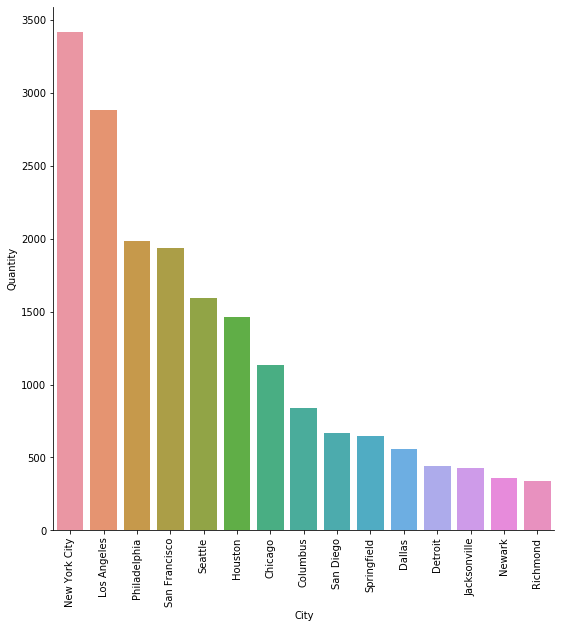

In [34]:
fig=plt.figure(figsize = (15,8))

sns.catplot(x='City',y='Quantity',data=top15_city,kind='bar',height=8)
plt.xticks(rotation=90)
plt.show()

In [35]:
#To Check Region wise Order Quantity

region=df.groupby('Region')['Quantity'].sum().reset_index()
region

,Region,Quantity
0,Central,8780
1,East,10618
2,South,6209
3,West,12266


In [36]:
labels=region["Region"].unique()
labels

array(['Central', 'East', 'South', 'West'], dtype=object)

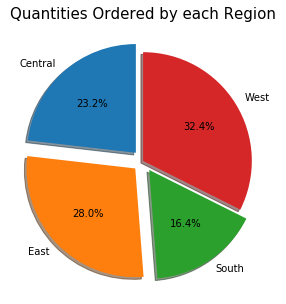

In [37]:
#To Check Quantity Ordered

fig=plt.figure(figsize=(8,5))

plt.pie(region['Quantity'],labels=labels,autopct='%1.1f%%',shadow=True,startangle=90,explode=(0.1,0.1,0.1,0))
plt.title('Quantities Ordered by each Region',size=15)
plt.show()

In [38]:
#To check distribution of Category by Ordered Quantity

category=df.groupby('Category')['Quantity'].sum().reset_index()
category

,Category,Quantity
0,Furniture,8028
1,Office Supplies,22906
2,Technology,6939


In [39]:
labels=category["Category"].unique()
labels

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

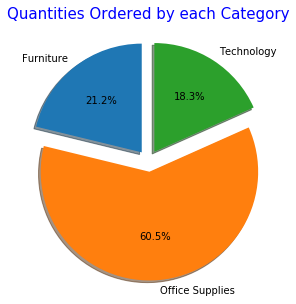

In [44]:
#To Check Quantity Ordered

fig=plt.figure(figsize=(8,5))

plt.pie(category['Quantity'],labels=labels,autopct='%1.1f%%',shadow=True,startangle=90,explode=(0.1,0.1,0.1))
plt.title('Quantities Ordered by each Category',size=15,color="Blue")
plt.show()

In [45]:
#To check Top 10 product sold  by their Profit

top10_items = df.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values('Profit',ascending=False)
top10_items = top10_items.head(10)
top10_items

,Sub-Category,Profit
6,Copiers,55617.8249
13,Phones,44515.7306
0,Accessories,41936.6357
12,Paper,34053.5693
3,Binders,30221.7633
5,Chairs,26590.1663
14,Storage,21278.8264
1,Appliances,18138.0054
9,Furnishings,13059.1436
7,Envelopes,6964.1767


<Figure size 1080x576 with 0 Axes>

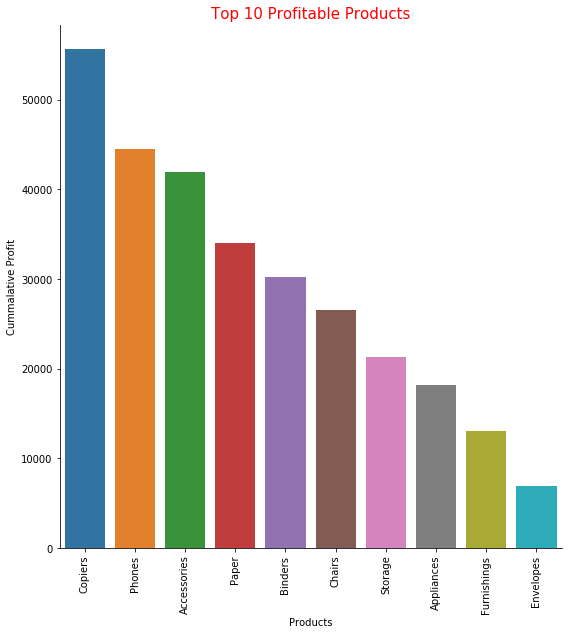

In [46]:
fig=plt.figure(figsize = (15,8))

sns.catplot(x='Sub-Category',y='Profit',data=top10_items,kind='bar',height=8)
plt.title('Top 10 Profitable Products',size=15,color="red")
plt.ylabel('Cummalative Profit')
plt.xlabel('Products')
plt.xticks(rotation=90)
plt.show()

In [47]:
#To check Top 10 Cities with their Profit

top10_city = df.groupby('City')['Profit'].sum().reset_index().sort_values('Profit',ascending=False)
top10_city = top10_city.head(10)
top10_city

,City,Profit
329,New York City,62036.9837
266,Los Angeles,30440.7579
452,Seattle,29156.0967
438,San Francisco,17507.3854
123,Detroit,13181.7908
233,Lafayette,10018.3876
215,Jackson,7581.6828
21,Atlanta,6993.6629
300,Minneapolis,6824.5846
437,San Diego,6377.1960


<Figure size 1080x576 with 0 Axes>

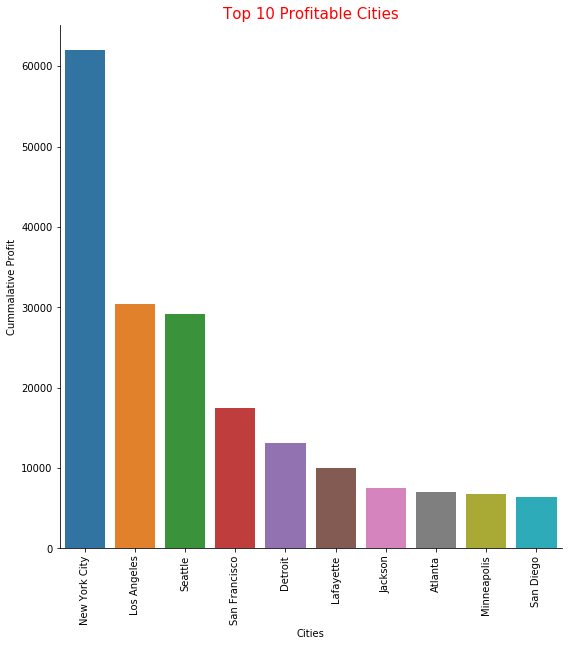

In [48]:
fig=plt.figure(figsize = (15,8))

sns.catplot(x='City',y='Profit',data=top10_city,kind='bar',height=8)
plt.title('Top 10 Profitable Cities',size=15,color="red")
plt.xlabel('Cities')
plt.ylabel('Cummalative Profit')
plt.xticks(rotation=90)
plt.show()